# Analisis Data

In [238]:
import pandas as pd
from numpy import NaN
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
path = '/content/British Airways.csv'
df = pd.read_csv(path)
df.head()

,reviews,date_reviews,seat_type,seat_comfort_ratings,cabin_staff_service_ratings,food_beverages_ratings,ground_service_ratings,recommended
0,✅ Trip Verified | Easy check in a T5. Galleri...,2023-08-13,Business Class,4.0,5.0,5.0,4.0,yes
1,"Not Verified | Flight delayed by an hour, it ...",2023-08-12,Economy Class,1.0,1.0,NaN,1.0,no
2,Not Verified | The staff are very rude and not...,2023-08-11,Economy Class,1.0,1.0,1.0,1.0,no
3,✅ Trip Verified | Good domestic flight operat...,2023-08-08,Economy Class,4.0,4.0,3.0,5.0,yes
4,Not Verified | Failed at all basic travel fund...,2023-08-08,Economy Class,3.0,3.0,NaN,1.0,no


## Data Cleansing

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   reviews                      1500 non-null   object 
 1   date_reviews                 1500 non-null   object 
 2   seat_type                    1500 non-null   object 
 3   seat_comfort_ratings         1410 non-null   float64
 4   cabin_staff_service_ratings  1400 non-null   float64
 5   food_beverages_ratings       1210 non-null   float64
 6   ground_service_ratings       1441 non-null   float64
 7   recommended                  1500 non-null   object 
dtypes: float64(4), object(4)
memory usage: 93.9+ KB


### Convert & Filtering Data

In [241]:
# mengubah tipe data kolom 'date_reviews' menjadi datetime
df['date_reviews'] = pd.to_datetime(df['date_reviews'])

# filtering trip yang terverifikasi
df = df[df['reviews'].str.contains('✅ Trip Verified')]

# menghapus kalimat '✅ Trip Verified' pada kolom reviews
df['reviews'] = df['reviews'].str.split('|').str[1].str.strip()

# menambah kolom year dari kolom date_reviews
df['year'] = df['date_reviews'].dt.year

# filtering tanggal
df = df.loc[(df['year'] >= 2018) & (df['year'] <= 2023)]

In [242]:
df.isnull().sum()

reviews                          0
date_reviews                     0
seat_type                        0
seat_comfort_ratings            66
cabin_staff_service_ratings     75
food_beverages_ratings         206
ground_service_ratings          41
recommended                      0
year                             0
dtype: int64

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1260
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   reviews                      1049 non-null   object        
 1   date_reviews                 1049 non-null   datetime64[ns]
 2   seat_type                    1049 non-null   object        
 3   seat_comfort_ratings         983 non-null    float64       
 4   cabin_staff_service_ratings  974 non-null    float64       
 5   food_beverages_ratings       843 non-null    float64       
 6   ground_service_ratings       1008 non-null   float64       
 7   recommended                  1049 non-null   object        
 8   year                         1049 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 82.0+ KB


### Handling Missing Values
mengisi data NULL dengan rata-rata tiap kolom

In [244]:
# fill data null pada kolom 'seat_comfort_ratings', 'cabin_staff_service_ratings', 'food_beverages_ratings', 'ground_service'
df['seat_comfort_ratings'] = df['seat_comfort_ratings'].fillna(df['seat_comfort_ratings'].mean())
df['cabin_staff_service_ratings'] = df['cabin_staff_service_ratings'].fillna(df['cabin_staff_service_ratings'].mean())
df['food_beverages_ratings'] = df['food_beverages_ratings'].fillna(df['food_beverages_ratings'].mean())
df['ground_service_ratings'] = df['ground_service_ratings'].fillna(df['ground_service_ratings'].mean())

In [245]:
df.isnull().sum()

reviews                        0
date_reviews                   0
seat_type                      0
seat_comfort_ratings           0
cabin_staff_service_ratings    0
food_beverages_ratings         0
ground_service_ratings         0
recommended                    0
year                           0
dtype: int64

In [246]:
df.head()

,reviews,date_reviews,seat_type,seat_comfort_ratings,cabin_staff_service_ratings,food_beverages_ratings,ground_service_ratings,recommended,year
0,Easy check in a T5. Galleries south and North ...,2023-08-13,Business Class,4.000000,5.000000,5.000000,4.0,yes,2023
3,Good domestic flight operated by BA Cityflyer....,2023-08-08,Economy Class,4.000000,4.000000,3.000000,5.0,yes,2023
5,They lost my baggage in a very simple situatio...,2023-08-08,Economy Class,3.000000,5.000000,4.000000,1.0,no,2023
6,Late boarding led to a one hour flight leaving...,2023-08-05,Economy Class,3.000000,3.000000,1.000000,1.0,no,2023
7,As usual the flight is delayed. BA try to blam...,2023-08-04,Economy Class,2.777213,3.183778,2.708185,1.0,no,2023


## Analisis

### Total Rekomendasi Secara Keseluruhan (Yes/No)

In [301]:
df.groupby(['recommended'])['reviews'].count().reset_index()

,recommended,reviews
0,no,679
1,yes,370


### Banyaknya tiap seat type

In [247]:
# sum_seat_type =
df.groupby(['seat_type'])['reviews'].count().reset_index()

,seat_type,reviews
0,Business Class,355
1,Economy Class,560
2,First Class,43
3,Premium Economy,91


### Perbandingan Banyak & Persentase Direkomendasikan/Tidak Direkomendasikan di Tiap Tipe Seat

In [248]:
df_seat = df.groupby(['recommended', 'seat_type'])['reviews'].count().reset_index()
df_seat['persentase(%)'] = (df_seat['reviews'] / df_seat.groupby('seat_type')['reviews'].transform('sum')) * 100

In [249]:
df_seat

,recommended,seat_type,reviews,persentase(%)
0,no,Business Class,209,58.873239
1,no,Economy Class,391,69.821429
2,no,First Class,22,51.162791
3,no,Premium Economy,57,62.637363
4,yes,Business Class,146,41.126761
5,yes,Economy Class,169,30.178571
6,yes,First Class,21,48.837209
7,yes,Premium Economy,34,37.362637


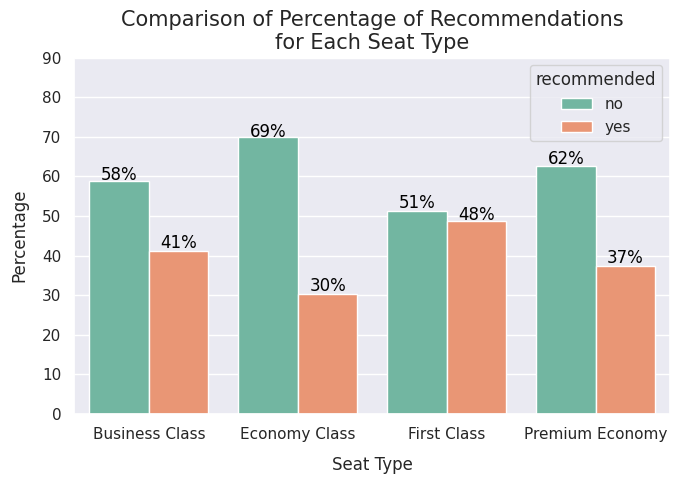

In [307]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(7,5))
sns.barplot(x = 'seat_type',y = 'persentase(%)', data = df_seat, hue = 'recommended', palette = "Set2")

for bar in ax.patches:
    bar_value = int(bar.get_height())
    text = f'{bar_value:,}%'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Seat Type', labelpad=10)
ax.set_ylabel('Percentage', labelpad=10)
ax.set_ylim(0,90)
plt.title('Comparison of Percentage of Recommendations\nfor Each Seat Type',size=15)
plt.tight_layout()
# plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200);

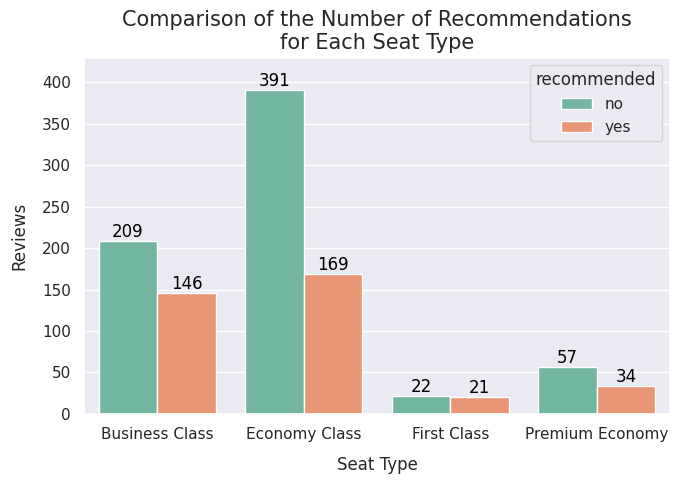

In [297]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(7,5))
sns.barplot(x = 'seat_type',y = 'reviews', data = df_seat, hue = 'recommended', palette = "Set2")

for bar in ax.patches:
    bar_value = int(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Seat Type', labelpad=10)
ax.set_ylabel('Reviews', labelpad=10)
ax.set_ylim(0,430)
plt.title('Comparison of the Number of Recommendations\nfor Each Seat Type',size=15)
# plt.title('Comparison of Percentage of Recommendations\nfor Each Seat Type',size=15)
plt.tight_layout()
# plt.savefig('Analyze_the_behavior_of_loan_property_customers_01.png', dpi=200);

### Cek Rata-Rata Rating Pada Tiap Seat Type

In [252]:
df.head()

,reviews,date_reviews,seat_type,seat_comfort_ratings,cabin_staff_service_ratings,food_beverages_ratings,ground_service_ratings,recommended,year
0,Easy check in a T5. Galleries south and North ...,2023-08-13,Business Class,4.000000,5.000000,5.000000,4.0,yes,2023
3,Good domestic flight operated by BA Cityflyer....,2023-08-08,Economy Class,4.000000,4.000000,3.000000,5.0,yes,2023
5,They lost my baggage in a very simple situatio...,2023-08-08,Economy Class,3.000000,5.000000,4.000000,1.0,no,2023
6,Late boarding led to a one hour flight leaving...,2023-08-05,Economy Class,3.000000,3.000000,1.000000,1.0,no,2023
7,As usual the flight is delayed. BA try to blam...,2023-08-04,Economy Class,2.777213,3.183778,2.708185,1.0,no,2023


In [253]:
column = ['seat_type', 'seat_comfort_ratings', 'cabin_staff_service_ratings', 'food_beverages_ratings', 'ground_service_ratings']
ratings_column = column[1:]

In [254]:
df2 = df[column].groupby(['seat_type']).mean().reset_index()
df2

,seat_type,seat_comfort_ratings,cabin_staff_service_ratings,food_beverages_ratings,ground_service_ratings
0,Business Class,2.784018,3.255135,2.912195,2.885608
1,Economy Class,2.675547,3.091264,2.551741,2.552172
2,First Class,3.692493,3.841483,3.272283,3.389281
3,Premium Economy,2.943803,3.163944,2.608502,3.010509


#### Business Class

In [255]:
df_business = df[df['seat_type'] == 'Business Class']
average_ratings_business = df_business[ratings_column].mean()

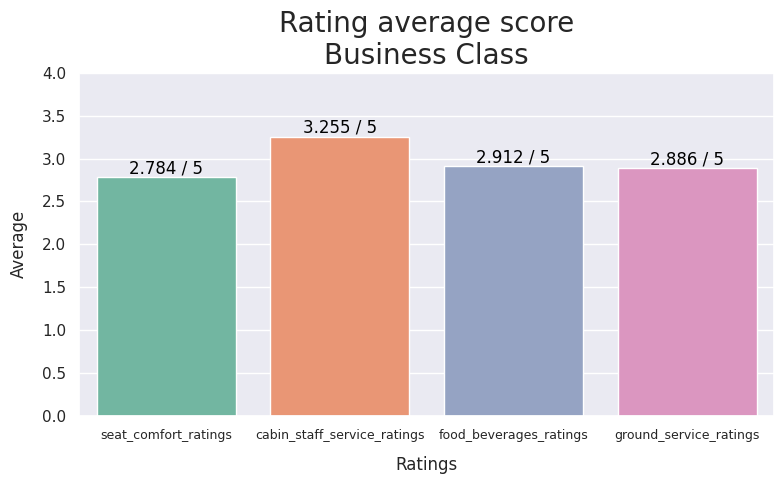

In [303]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(8,5))
sns.barplot(x = average_ratings_business.index,y = average_ratings_business.values, palette = "Set2")

for bar in ax.patches:
    bar_value = round(bar.get_height(),3)
    text = f'{bar_value:,} / 5'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Ratings', labelpad=10)
plt.xticks(fontsize=9)
ax.set_ylabel('Average', labelpad=10)
ax.set_ylim(0,4)
plt.title('Rating average score\nBusiness Class',size=20)
plt.tight_layout()

#### Economy Class

In [257]:
df_economy = df[df['seat_type'] == 'Economy Class']
average_ratings_economy = df_economy[ratings_column].mean()

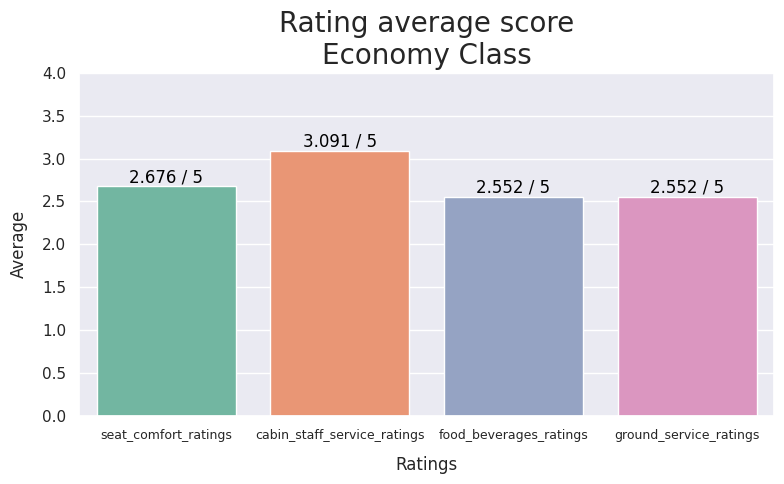

In [304]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(8,5))
sns.barplot(x = average_ratings_economy.index,y = average_ratings_economy.values, palette = "Set2")

for bar in ax.patches:
    bar_value = round(bar.get_height(),3)
    text = f'{bar_value:,} / 5'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Ratings', labelpad=10)
plt.xticks(fontsize=9)
ax.set_ylabel('Average', labelpad=10)
ax.set_ylim(0,4)
plt.title('Rating average score\nEconomy Class',size=20)
plt.tight_layout()

#### First Class

In [259]:
df_first = df[df['seat_type'] == 'First Class']
average_ratings_first = df_first[ratings_column].mean()

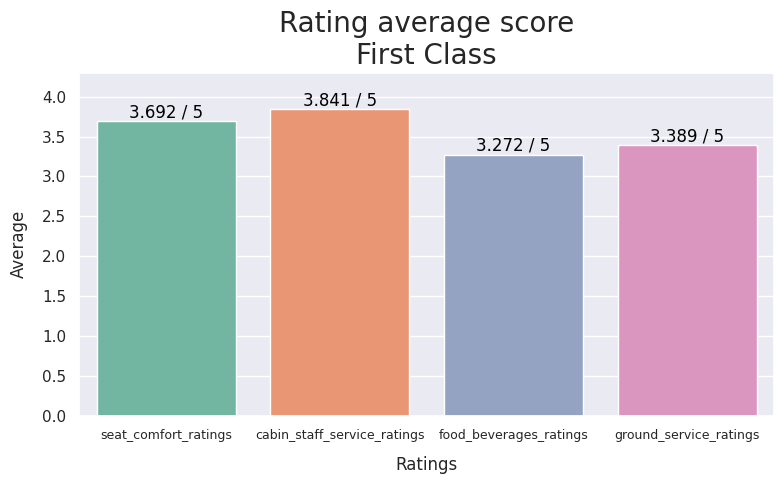

In [305]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(8,5))
sns.barplot(x = average_ratings_first.index,y = average_ratings_first.values, palette = "Set2")

for bar in ax.patches:
    bar_value = round(bar.get_height(),3)
    text = f'{bar_value:,} / 5'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Ratings', labelpad=10)
plt.xticks(fontsize=9)
ax.set_ylabel('Average', labelpad=10)
ax.set_ylim(0,4.3)
plt.title('Rating average score\nFirst Class',size=20)
plt.tight_layout()

#### Premium Economy

In [261]:
df_premium = df[df['seat_type'] == 'Premium Economy']
average_ratings_premium = df_premium[ratings_column].mean()

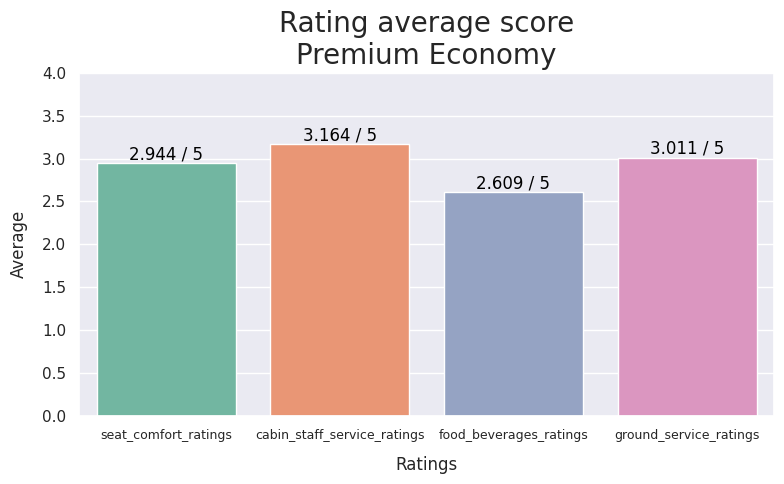

In [306]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(8,5))
sns.barplot(x = average_ratings_premium.index,y = average_ratings_premium.values, palette = "Set2")

for bar in ax.patches:
    bar_value = round(bar.get_height(),3)
    text = f'{bar_value:,} / 5'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Ratings', labelpad=10)
plt.xticks(fontsize=9)
ax.set_ylabel('Average', labelpad=10)
ax.set_ylim(0,4)
plt.title('Rating average score\nPremium Economy',size=20)
plt.tight_layout()

### Tren Per Tahun (2019-2022)

In [263]:
df.head()

,reviews,date_reviews,seat_type,seat_comfort_ratings,cabin_staff_service_ratings,food_beverages_ratings,ground_service_ratings,recommended,year
0,Easy check in a T5. Galleries south and North ...,2023-08-13,Business Class,4.000000,5.000000,5.000000,4.0,yes,2023
3,Good domestic flight operated by BA Cityflyer....,2023-08-08,Economy Class,4.000000,4.000000,3.000000,5.0,yes,2023
5,They lost my baggage in a very simple situatio...,2023-08-08,Economy Class,3.000000,5.000000,4.000000,1.0,no,2023
6,Late boarding led to a one hour flight leaving...,2023-08-05,Economy Class,3.000000,3.000000,1.000000,1.0,no,2023
7,As usual the flight is delayed. BA try to blam...,2023-08-04,Economy Class,2.777213,3.183778,2.708185,1.0,no,2023


In [264]:
df_series = df[['reviews', 'date_reviews']]
df_series.head()

,reviews,date_reviews
0,Easy check in a T5. Galleries south and North ...,2023-08-13
3,Good domestic flight operated by BA Cityflyer....,2023-08-08
5,They lost my baggage in a very simple situatio...,2023-08-08
6,Late boarding led to a one hour flight leaving...,2023-08-05
7,As usual the flight is delayed. BA try to blam...,2023-08-04


In [265]:
# df_series['date_reviews'] = df_series[]
df_series['month_date_reviews'] = df_series['date_reviews'].dt.strftime('%Y-%m')
df_series.head()

<ipython-input-265-e9a0252bf2e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series['month_date_reviews'] = df_series['date_reviews'].dt.strftime('%Y-%m')


,reviews,date_reviews,month_date_reviews
0,Easy check in a T5. Galleries south and North ...,2023-08-13,2023-08
3,Good domestic flight operated by BA Cityflyer....,2023-08-08,2023-08
5,They lost my baggage in a very simple situatio...,2023-08-08,2023-08
6,Late boarding led to a one hour flight leaving...,2023-08-05,2023-08
7,As usual the flight is delayed. BA try to blam...,2023-08-04,2023-08


In [266]:
df_series[['date_reviews', 'month_date_reviews']]

,date_reviews,month_date_reviews
0,2023-08-13,2023-08
3,2023-08-08,2023-08
5,2023-08-08,2023-08
6,2023-08-05,2023-08
7,2023-08-04,2023-08
...,...,...
1256,2018-01-05,2018-01
1257,2018-01-05,2018-01
1258,2018-01-03,2018-01
1259,2018-01-01,2018-01


#### 2019

In [267]:
df_series_2019 = df_series[df_series['date_reviews'].dt.year == 2019]

In [268]:
df_grouped_2019 = df_series_2019.groupby(df_series_2019['month_date_reviews'])['reviews'].count(). reset_index()
df_grouped_2019

,month_date_reviews,reviews
0,2019-01,33
1,2019-02,29
2,2019-03,22
3,2019-04,20
4,2019-05,31
5,2019-06,26
6,2019-07,27
7,2019-08,25
8,2019-09,23
9,2019-10,31


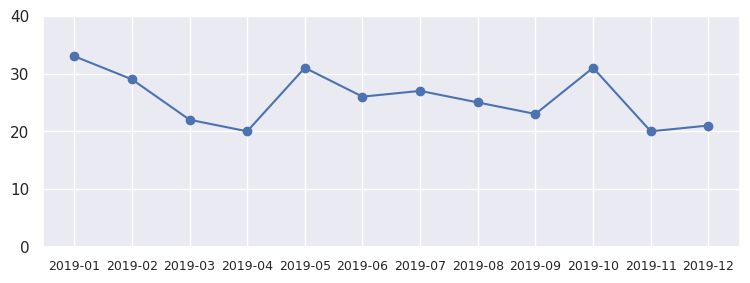

In [269]:
plt.figure(figsize=(9,3))
plt.plot(df_grouped_2019['month_date_reviews'], df_grouped_2019['reviews'], marker='o')
plt.xticks(fontsize=9)
plt.ylim(0,40)
plt.show()

#### 2020

In [270]:
df_series_2020 = df_series[df_series['date_reviews'].dt.year == 2020]

In [271]:
df_grouped_2020 = df_series_2020.groupby(df_series_2020['month_date_reviews'])['reviews'].count(). reset_index()
df_grouped_2020

,month_date_reviews,reviews
0,2020-01,26
1,2020-02,12
2,2020-03,13
3,2020-04,10
4,2020-05,4
5,2020-06,3
6,2020-07,3
7,2020-08,3
8,2020-09,2
9,2020-10,2


In [272]:
# menambahkan baris baru, karena pada bulan 11 tidak ada reviews
new_row = pd.DataFrame({'month_date_reviews': ['2020-11'], 'reviews': [0]})
df_grouped_2020 = pd.concat([df_grouped_2020.iloc[:10], new_row, df_grouped_2020.iloc[10:]]).reset_index(drop=True)

In [273]:
df_grouped_2020

,month_date_reviews,reviews
0,2020-01,26
1,2020-02,12
2,2020-03,13
3,2020-04,10
4,2020-05,4
5,2020-06,3
6,2020-07,3
7,2020-08,3
8,2020-09,2
9,2020-10,2


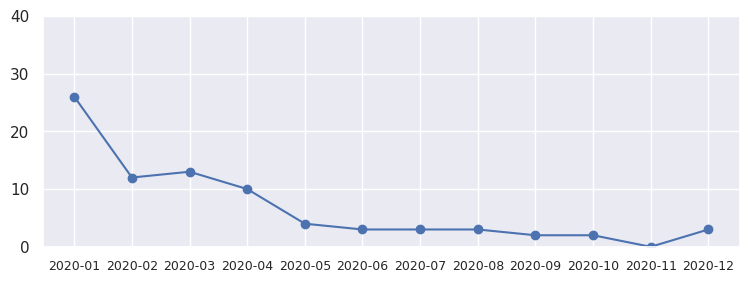

In [274]:
plt.figure(figsize=(9,3))
plt.plot(df_grouped_2020['month_date_reviews'], df_grouped_2020['reviews'], marker='o')
plt.xticks(fontsize=9)
plt.ylim(0,40)
plt.show()

#### 2021

In [275]:
df_series_2021 = df_series[df_series['date_reviews'].dt.year == 2021]

In [276]:
df_grouped_2021 = df_series_2021.groupby(df_series_2021['month_date_reviews'])['reviews'].count(). reset_index()
df_grouped_2021

,month_date_reviews,reviews
0,2021-02,3
1,2021-03,1
2,2021-04,3
3,2021-05,3
4,2021-06,2
5,2021-07,4
6,2021-08,7
7,2021-09,9
8,2021-10,15
9,2021-11,11


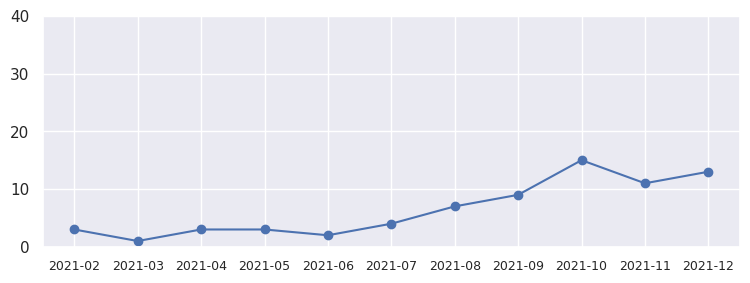

In [277]:
plt.figure(figsize=(9,3))
plt.plot(df_grouped_2021['month_date_reviews'], df_grouped_2021['reviews'], marker='o')
plt.xticks(fontsize=9)
plt.ylim(0,40)
plt.show()

#### 2022

In [278]:
df_series_2022 = df_series[df_series['date_reviews'].dt.year == 2022]

In [279]:
df_grouped_2022 = df_series_2022.groupby(df_series_2022['month_date_reviews'])['reviews'].count(). reset_index()

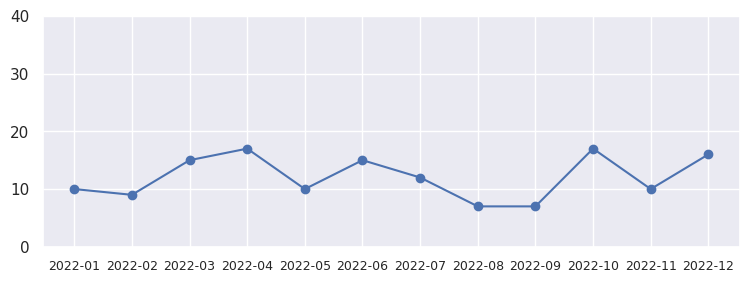

In [280]:
plt.figure(figsize=(9,3))
plt.plot(df_grouped_2022['month_date_reviews'], df_grouped_2022['reviews'], marker='o')
plt.xticks(fontsize=9)
plt.ylim(0,40)
plt.show()

### WordClouds

In [281]:
df_wc = df[['reviews', 'seat_type', 'recommended']]
df_wc.head()

,reviews,seat_type,recommended
0,Easy check in a T5. Galleries south and North ...,Business Class,yes
3,Good domestic flight operated by BA Cityflyer....,Economy Class,yes
5,They lost my baggage in a very simple situatio...,Economy Class,no
6,Late boarding led to a one hour flight leaving...,Economy Class,no
7,As usual the flight is delayed. BA try to blam...,Economy Class,no


In [282]:
import string
import re

#### Cleaning Text

In [283]:
def clean_text(text):
  return re.sub('[^a-zA-Z]', ' ', text).lower()
df_wc['cleaned_text'] = df_wc['reviews'].apply(lambda x: clean_text(x)) # membersihkan teks
df_wc['label'] = df_wc['recommended'].map({'no':0, 'yes':1}) # labeling berdasarkan recommended

<ipython-input-283-a7d3739be677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc['cleaned_text'] = df_wc['reviews'].apply(lambda x: clean_text(x)) # membersihkan teks
<ipython-input-283-a7d3739be677>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc['label'] = df_wc['recommended'].map({'no':0, 'yes':1}) # labeling berdasarkan recommended


#### Tokenization

In [284]:
def tokenization(text):
  tz_text = text.split()
  return tz_text
df_wc['token'] = df_wc['cleaned_text'].apply(lambda x: tokenization(x))

<ipython-input-284-c0aec2203f0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc['token'] = df_wc['cleaned_text'].apply(lambda x: tokenization(x))


In [285]:
df_wc.head()

,reviews,seat_type,recommended,cleaned_text,label,token
0,Easy check in a T5. Galleries south and North ...,Business Class,yes,easy check in a t galleries south and north ...,1,"[easy, check, in, a, t, galleries, south, and,..."
3,Good domestic flight operated by BA Cityflyer....,Economy Class,yes,good domestic flight operated by ba cityflyer ...,1,"[good, domestic, flight, operated, by, ba, cit..."
5,They lost my baggage in a very simple situatio...,Economy Class,no,they lost my baggage in a very simple situatio...,0,"[they, lost, my, baggage, in, a, very, simple,..."
6,Late boarding led to a one hour flight leaving...,Economy Class,no,late boarding led to a one hour flight leaving...,0,"[late, boarding, led, to, a, one, hour, flight..."
7,As usual the flight is delayed. BA try to blam...,Economy Class,no,as usual the flight is delayed ba try to blam...,0,"[as, usual, the, flight, is, delayed, ba, try,..."


#### Lemmatization & Removing Stopword

In [286]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [287]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
  return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df_wc['lemmatized_reviews'] = df_wc['token'].apply(lambda x: lemmatize_text(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-287-cb770d0cc825>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wc['lemmatized_reviews'] = df_wc['token'].apply(lambda x: lemmatize_text(x))


In [288]:
df_wc

,reviews,seat_type,recommended,cleaned_text,label,token,lemmatized_reviews
0,Easy check in a T5. Galleries south and North ...,Business Class,yes,easy check in a t galleries south and north ...,1,"[easy, check, in, a, t, galleries, south, and,...",easy check gallery south north lounge packed a...
3,Good domestic flight operated by BA Cityflyer....,Economy Class,yes,good domestic flight operated by ba cityflyer ...,1,"[good, domestic, flight, operated, by, ba, cit...",good domestic flight operated ba cityflyer gro...
5,They lost my baggage in a very simple situatio...,Economy Class,no,they lost my baggage in a very simple situatio...,0,"[they, lost, my, baggage, in, a, very, simple,...",lost baggage simple situation three week care ...
6,Late boarding led to a one hour flight leaving...,Economy Class,no,late boarding led to a one hour flight leaving...,0,"[late, boarding, led, to, a, one, hour, flight...",late boarding led one hour flight leaving two ...
7,As usual the flight is delayed. BA try to blam...,Economy Class,no,as usual the flight is delayed ba try to blam...,0,"[as, usual, the, flight, is, delayed, ba, try,...",usual flight delayed ba try blame someone inab...
...,...,...,...,...,...,...,...
1256,Amsterdam to London. Service Ryanair wouldn't ...,Economy Class,no,amsterdam to london service ryanair wouldn t ...,0,"[amsterdam, to, london, service, ryanair, woul...",amsterdam london service ryanair tolerate prem...
1257,London to Johannesburg. I was pleasantly surpr...,Economy Class,yes,london to johannesburg i was pleasantly surpr...,1,"[london, to, johannesburg, i, was, pleasantly,...",london johannesburg pleasantly surprised good ...
1258,Will never fly with BA again. Outbound flight ...,Business Class,no,will never fly with ba again outbound flight ...,0,"[will, never, fly, with, ba, again, outbound, ...",never fly ba outbound flight economy toilet br...
1259,London to Tel Aviv. I have been waiting on my...,Business Class,no,london to tel aviv i have been waiting on my...,0,"[london, to, tel, aviv, i, have, been, waiting...",london tel aviv waiting luggage five day trip ...


#### Visualize Word Clouds

In [289]:
from wordcloud import WordCloud

In [290]:
recom_no = df_wc[df_wc['recommended'] == 'no']
recom_yes = df_wc[df_wc['recommended'] == 'yes']

# convert to list (lemmatized text)
no_lemmatized = recom_no['lemmatized_reviews'].tolist()
yes_lemmatized = recom_yes['lemmatized_reviews'].tolist()

filtered_no = ("").join(str(no_lemmatized)) # convert the list into a string of spam
filtered_no = filtered_no.lower()

filtered_yes = ("").join(str(yes_lemmatized)) # convert the list into a string of spam
filtered_yes = filtered_yes.lower()

##### Word Clouds: Yes Recommended

Text(0.5, 1.0, 'Word Cloud: Yes Recommended')

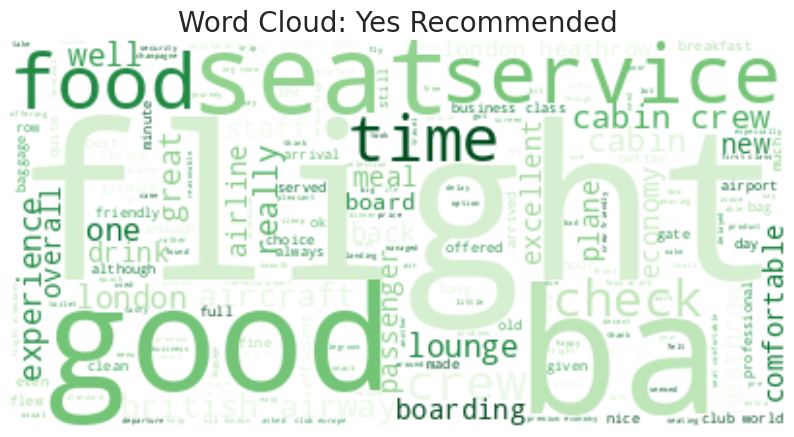

In [291]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color='white', colormap='Greens').generate(filtered_yes)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Word Cloud: Yes Recommended',size=20)

##### Word Clouds: No Recommended

Text(0.5, 1.0, 'Word Cloud: No Recommended')

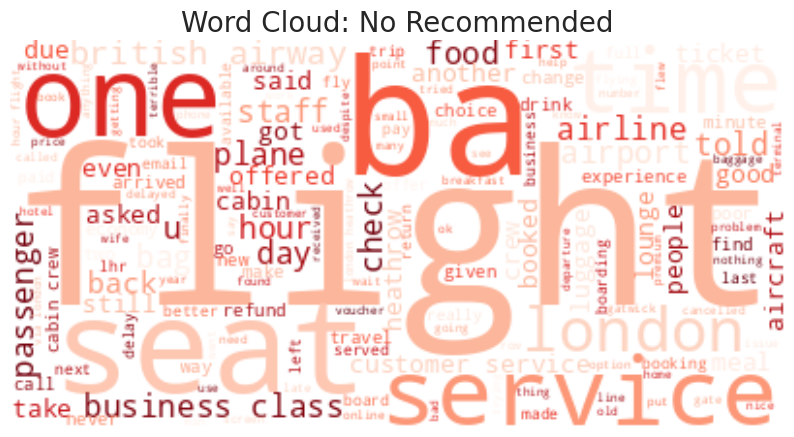

In [292]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color='white', colormap='Reds').generate(filtered_no)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('Word Cloud: No Recommended',size=20)